In [1]:
import pandas as pd
from prophet import Prophet

/Volumes/personal/conda_envs/forecast/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("data_invoice_amount_history.csv")
# data.head()

In [3]:
df = data[["InvoiceDate", "InvoiceAmount"]]
df.rename(columns={"InvoiceDate": "ds"}, inplace=True)
df.rename(columns={"InvoiceAmount": "y"}, inplace=True)
df

/var/folders/4d/gx0lrt1n0l34spb_k9cnkfpr0000gn/T/ipykernel_37789/1866556752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"InvoiceDate": "ds"}, inplace=True)
/var/folders/4d/gx0lrt1n0l34spb_k9cnkfpr0000gn/T/ipykernel_37789/1866556752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"InvoiceAmount": "y"}, inplace=True)


,ds,y
0,2023-12-07,2185.83
1,2023-12-19,312.06
2,2023-10-30,3484.39
3,2023-06-21,60.38
4,2023-12-06,1905.05
...,...,...
7252,2023-07-26,272.26
7253,2023-06-28,593.77
7254,2023-05-03,600.00
7255,2023-02-22,14623.29


In [4]:
m = Prophet()
m.fit(df)

16:02:10 - cmdstanpy - INFO - Chain [1] start processing
16:02:10 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1958,2024-12-21
1959,2024-12-22
1960,2024-12-23
1961,2024-12-24
1962,2024-12-25


In [6]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1958,2024-12-21,1993.598304,-4642.078686,8680.721730
1959,2024-12-22,2303.121759,-5175.689739,10041.448820
1960,2024-12-23,1873.536137,-5639.277823,9509.372814
1961,2024-12-24,1927.260867,-5428.884974,9097.487298
1962,2024-12-25,2011.849144,-5254.515806,8889.697144


In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,4300.200491,-2889.260029,11318.810649,4300.200491,4300.200491,-349.413394,-349.413394,-349.413394,-8.546340,-8.546340,-8.546340,-340.867054,-340.867054,-340.867054,0.0,0.0,0.0,3950.787097
1,2018-01-03,4298.112932,-2448.552101,10919.665916,4298.112932,4298.112932,-260.927637,-260.927637,-260.927637,94.801737,94.801737,94.801737,-355.729374,-355.729374,-355.729374,0.0,0.0,0.0,4037.185296
2,2018-01-04,4296.025374,-2831.283996,11491.767811,4296.025374,4296.025374,-367.441692,-367.441692,-367.441692,0.681349,0.681349,0.681349,-368.123042,-368.123042,-368.123042,0.0,0.0,0.0,3928.583682
3,2018-01-05,4293.937816,-3975.549564,11176.609903,4293.937816,4293.937816,-733.229817,-733.229817,-733.229817,-355.605247,-355.605247,-355.605247,-377.624570,-377.624570,-377.624570,0.0,0.0,0.0,3560.707999
4,2018-01-08,4287.675142,-3732.024039,10709.482380,4287.675142,4287.675142,-464.847863,-464.847863,-464.847863,-79.260867,-79.260867,-79.260867,-385.586996,-385.586996,-385.586996,0.0,0.0,0.0,3822.827279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,2024-12-21,2125.566395,-4642.078686,8680.721730,1632.136968,2586.124920,-131.968091,-131.968091,-131.968091,12.669062,12.669062,12.669062,-144.637153,-144.637153,-144.637153,0.0,0.0,0.0,1993.598304
1959,2024-12-22,2122.575676,-5175.689739,10041.448820,1626.461924,2584.780661,180.546082,180.546082,180.546082,335.260306,335.260306,335.260306,-154.714224,-154.714224,-154.714224,0.0,0.0,0.0,2303.121759
1960,2024-12-23,2119.584958,-5639.277823,9509.372814,1620.786879,2583.436401,-246.048821,-246.048821,-246.048821,-79.260867,-79.260867,-79.260867,-166.787954,-166.787954,-166.787954,0.0,0.0,0.0,1873.536137
1961,2024-12-24,2116.594239,-5428.884974,9097.487298,1615.111835,2582.092141,-189.333372,-189.333372,-189.333372,-8.546340,-8.546340,-8.546340,-180.787032,-180.787032,-180.787032,0.0,0.0,0.0,1927.260867


/Volumes/personal/conda_envs/forecast/lib/python3.11/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Volumes/personal/conda_envs/forecast/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


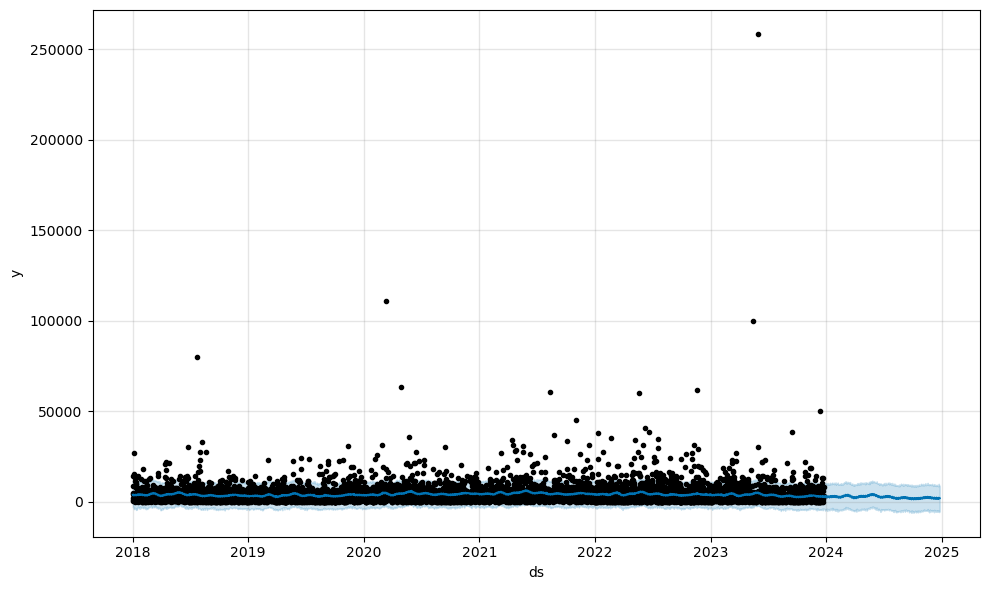

In [7]:
fig1 = m.plot(forecast)

/Volumes/personal/conda_envs/forecast/lib/python3.11/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Volumes/personal/conda_envs/forecast/lib/python3.11/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Volumes/personal/conda_envs/forecast/lib/python3.11/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

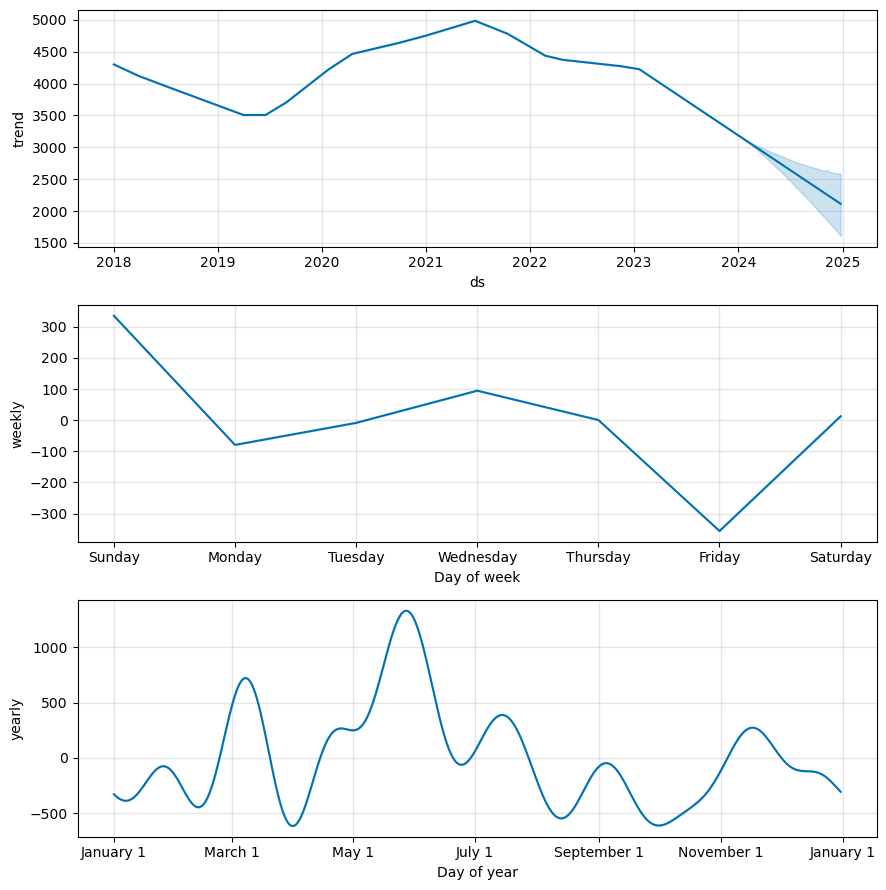

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
 |      flat trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selec

In [10]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [11]:
plot_components_plotly(m, forecast)